# Seasonal/Hourly SO

## Explore SO vs. month and vs. hour

In [1]:
# imports
from importlib import reload

import numpy as np

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils

# Load

In [2]:
line = '90'
perc = 98.

## Full dataset

In [3]:
grid_outliers, grid_tbl, ds = grid_utils.gen_outliers(line, perc)
clusters.generate_clusters(grid_outliers)

Found 386 unique clusters


In [4]:
reload(grid_utils)
grid_utils.fill_in_grid(grid_tbl, ds)

In [5]:
grid_tbl.head()

,depth,profile,row,col,doxy,doxy_p,time,lon,z,CT,SA,sigma0,SO,chla
0,0,32173,17,16,252.912731,88.939052,2016-12-14 19:52:21,-117.460120,10,16.249462,33.523891,24.446819,1.033524,0.169041
1,0,32174,17,16,252.951126,89.164786,2016-12-14 20:47:19,-117.463420,10,16.214990,33.522302,24.453442,1.032982,0.176322
2,0,32175,17,17,253.346587,80.334728,2016-12-14 21:38:13,-117.465688,10,16.158025,33.511012,24.457791,1.033375,0.252030
3,0,32176,17,17,254.551252,86.192469,2016-12-14 22:50:08,-117.471270,10,16.057278,33.502061,24.473762,1.036203,0.431141
4,0,32177,17,16,251.471860,85.101580,2016-12-15 00:11:51,-117.477442,10,16.372075,33.522704,24.417984,1.030055,0.267575


## Times for convenience

In [6]:
ptimes = pandas.to_datetime(grid_outliers.time.values)
aptimes = pandas.to_datetime(grid_tbl.time.values)

# Standard stats

In [7]:
cluster_stats = clusters.cluster_stats(grid_outliers)
cluster_stats.head()

,z,lon,doxy,time,SA,CT,sigma0,SO,chla,max_doxy,max_SO,max_chla,N,cluster
0,15.600000,-118.009290,278.942976,2017-03-17 05:13:22.506666752,33.417848,14.997837,24.640720,1.111353,0.376499,309.040496,1.237211,0.710987,75,0
1,12.500000,-117.987563,263.682135,2017-04-09 09:25:06.666666496,33.504671,16.216080,24.439004,1.076490,0.220169,271.135380,1.099654,0.319463,12,1
2,13.076923,-119.560430,268.295324,2017-04-15 22:35:44.923077120,33.545435,14.173875,24.914860,1.052789,1.522748,271.505720,1.060757,2.138465,13,2
3,19.375000,-119.904488,264.906934,2017-06-21 04:50:49.875000064,33.475110,15.639963,24.546332,1.069439,1.439475,267.124543,1.082783,2.477573,16,3
4,18.674699,-117.641209,295.869543,2017-07-07 12:29:09.132529664,33.563195,15.655587,24.601511,1.198933,0.920417,423.426695,1.806465,4.022911,83,4


# Cluster durations

## Find start/end times

In [8]:
cluster_IDs = np.unique(grid_outliers.cluster.values[
        grid_outliers.cluster.values >= 0])
cluster_IDs[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
start_month, end_month = [], []

for cluster_ID in cluster_IDs:
    in_cluster = grid_outliers.cluster.values == cluster_ID
    #
    itimes = ptimes[in_cluster]
    itstart = itimes.min()
    itend = itimes.max()
    # Save
    start_month.append(itstart.month)
    endm = itend.month + 12 * (itend.year-itstart.year)
    end_month.append(endm)
# Arrays
start_month = np.array(start_month)
end_month = np.array(end_month)

In [10]:
(end_month - start_month).max()

3

## Plot

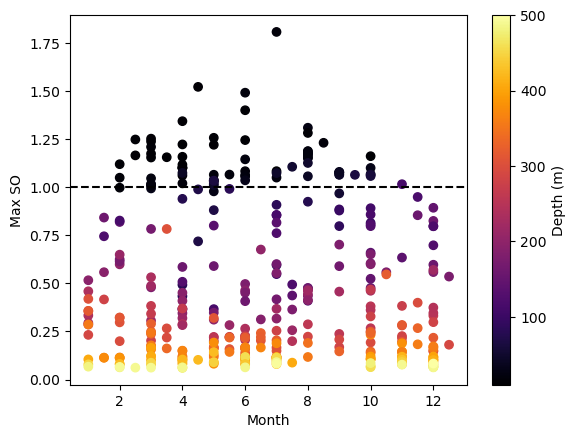

In [11]:
plt.clf()
ax = plt.gca()
# Average month
avg_month = (start_month + end_month)/2.
# Plot
sc = ax.scatter(avg_month, cluster_stats['max_SO'], c=cluster_stats.z,
               cmap='inferno')
cb = plt.colorbar(sc)
cb.set_label('Depth (m)')
#
ax.axhline(1., color='k', ls='--')
ax.set_xlabel('Month')
ax.set_ylabel('Max SO')
plt.show()

----

# PDF

## Cut on SO

In [12]:
grid_tbl['month'] = aptimes.month

In [13]:
SO_cut = grid_tbl.SO >= 1.

<Axes: xlabel='month', ylabel='Count'>

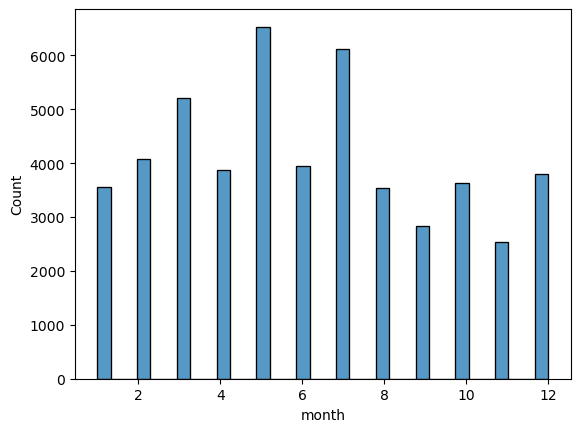

In [14]:
sns.histplot(grid_tbl[SO_cut], x='month')

## Hourly

In [15]:
grid_tbl['hour'] = aptimes.hour

<Axes: xlabel='hour', ylabel='Count'>

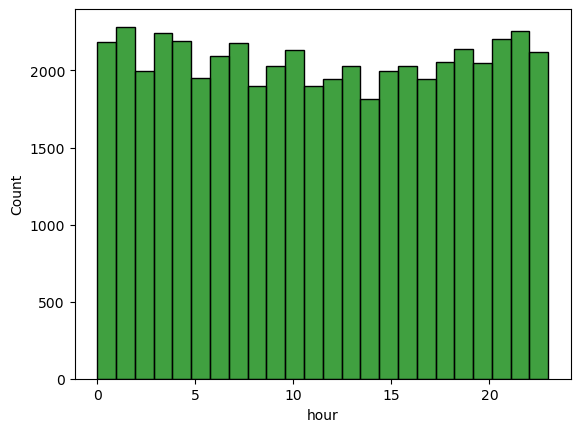

In [16]:
sns.histplot(grid_tbl[SO_cut], x='hour', color='g',bins=24)